In [1]:
%matplotlib inline

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import gridspec

In [3]:
def get_ppv(sens, spec, prev):
    tp = sens * prev
    tn = spec * (1-prev)
    fp = (1-spec) * (1-prev)
    fn = (1-sens) * prev
    ppv = tp/(tp+fp)
    return ppv

def get_acc(sens, spec, prev):
    tp = sens * prev
    tn = spec * (1-prev)
    fp = (1-spec) * (1-prev)
    fn = (1-sens) * prev
    acc = (tp+tn)/(tp+fp+tn+fn)
    return acc

def get_or(sens, spec, prev):
    tp = sens * prev
    tn = spec * (1-prev)
    fp = (1-spec) * (1-prev)
    fn = (1-sens) * prev
    OR = (tp/fp)/(fn/tn)
    return OR

def get_rr(sens, spec, prev):
    tp = sens * prev
    tn = spec * (1-prev)
    fp = (1-spec) * (1-prev)
    fn = (1-sens) * prev
    RR = (tp/(fp+tp))/(fn/(fn+tn))
    return RR

In [4]:
# Calculate Traut sensitivity and specificity from figure 2B of their paper, confirmatory approach
traut_tpr = 0.254
traut_fpr = 0.03

traut_sens = traut_tpr
traut_spec = 1-traut_fpr

In [5]:
# Base rate
print(1/90)

0.011111111111111112


In [6]:
mod_hrs = (0.042, 0.995) # Our model
mod_abraham = (0.61, 0.723) # Abraham model
mod_heinsfeld = (0.74, 0.63) # Heinsfeld model
mod_traut = (traut_sens, traut_spec) # Traut model

In [7]:
def mm2in(mm):
    return mm/25.4

In [8]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Arial']

/tmp/ipykernel_664015/3020595135.py:71: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  f.savefig('/home/neuromod/ASD_high_risk_endophenotype_code_supplement/Figures/fig4_supp_performance.png', bbox_extra_artists=(lgd,), dpi=300, transparent=True, bbox_inches='tight')
/tmp/ipykernel_664015/3020595135.py:72: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  f.savefig('/home/neuromod/ASD_high_risk_endophenotype_code_supplement/Figures/fig4_supp_performance.svg', bbox_extra_artists=(lgd,), dpi=300, transparent=True, bbox_inches='tight')
/home/neuromod/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/home/neuromod/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWar

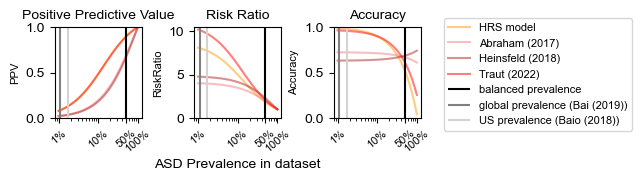

In [9]:
prev_range = np.logspace(-2, 0, 100)

dpi=300
scale_factor = 1
height = 30 * scale_factor
width = 120 * scale_factor

f = plt.figure(figsize=(mm2in(width),mm2in(height)), constrained_layout=True)
gs = gridspec.GridSpec(nrows=1, ncols=3, wspace=0.6)
ax1 = f.add_subplot(gs[0])
ax2 = f.add_subplot(gs[2])
ax3 = f.add_subplot(gs[1])

ax1.plot(prev_range, [get_ppv(*mod_hrs, prev) for prev in prev_range], label='HRS model', color='#FE9D08', alpha=0.5)
ax1.plot(prev_range, [get_ppv(*mod_abraham, prev) for prev in prev_range], label='Abraham (2017)', color="lightcoral", alpha=0.5)
ax1.plot(prev_range, [get_ppv(*mod_heinsfeld, prev) for prev in prev_range], label='Heinsfeld (2018)', color="firebrick", alpha=0.5)
ax1.plot(prev_range, [get_ppv(*mod_traut, prev) for prev in prev_range], label='Traut (2022)', color="red", alpha=0.5)

ax1.vlines(0.5, 0, 1, color='black')
ax1.vlines(0.011, 0, 1, color='grey')
ax1.vlines(0.0169, 0, 1, color='lightgrey')
ax1.set_xscale('log')

ax1.set_xticks([0.01, 0.1, 0.5, 1])
ax1.set_yticks([0, 0.5, 1])

ax1.set_xticklabels([])
ax1.set_ylabel('PPV', fontsize=8)
ax1.set_xticklabels(['1%', '10%', '50%', '100%'], rotation=40, fontsize=8)

ax1.set_title('Positive Predictive Value', fontsize=10)
ax1.set_ylim(0, 1)

ax2.plot(prev_range, [get_acc(*mod_hrs, prev) for prev in prev_range], label='HRS model', color='#FE9D08', alpha=0.5)
ax2.plot(prev_range, [get_acc(*mod_abraham, prev) for prev in prev_range], label='Abraham (2017)', color="lightcoral", alpha=0.5)
ax2.plot(prev_range, [get_acc(*mod_heinsfeld, prev) for prev in prev_range], label='Heinsfeld (2018)', color="firebrick", alpha=0.5)
ax2.plot(prev_range, [get_acc(*mod_traut, prev) for prev in prev_range], label='Traut (2022)', color="red", alpha=0.5)

ax2.vlines(0.5, 0, 1, color='black', label='balanced prevalence')
ax2.vlines(0.011, 0, 1, color='grey', label='global prevalence (Bai (2019))')
ax2.vlines(0.0169, 0, 1, color='lightgrey', label= 'US prevalence (Baio (2018))')
ax2.set_xscale('log')

ax2.set_xticks([0.01, 0.1, 0.5, 1])
ax2.set_yticks([0, 0.5, 1])
ax2.set_xticklabels([])
ax2.set_ylabel('Accuracy', fontsize=8)
ax2.set_xticklabels(['1%', '10%', '50%', '100%'], rotation=40, fontsize=8)

ax2.set_title('Accuracy', fontsize=10)
ax2.set_ylim(0, 1)

ax3.plot(prev_range, [get_rr(*mod_hrs, prev) for prev in prev_range], label='HRS model', color='#FE9D08', alpha=0.5)
ax3.plot(prev_range, [get_rr(*mod_abraham, prev) for prev in prev_range], label='Abraham (2017)', color="lightcoral", alpha=0.5)
ax3.plot(prev_range, [get_rr(*mod_heinsfeld, prev) for prev in prev_range], label='Heinsfeld (2018)', color="firebrick", alpha=0.5)
ax3.plot(prev_range, [get_rr(*mod_traut, prev) for prev in prev_range], label='Traut (2022)', color="red", alpha=0.5)

ax3.vlines(0.5, 0, 10.5, color='black')
ax3.vlines(0.011, 0, 10.5, color='grey')
ax3.vlines(0.0169, 0, 10.5, color='lightgrey')
ax3.set_xscale('log')

ax3.set_ylabel('RiskRatio', fontsize=8)
ax3.set_xlabel('ASD Prevalence in dataset', fontsize=10)
ax3.set_xticks([0.01, 0.1, 0.5, 1])
ax3.set_xticklabels(['1%', '10%', '50%', '100%'], rotation=40, fontsize=8)
ax3.set_title('Risk Ratio', fontsize=10)
ax3.set_ylim(0, 10.5)

lgd = ax2.legend(loc='lower left', fontsize=8, bbox_to_anchor=(1.2, -0.2))
f.savefig('/home/neuromod/ASD_high_risk_endophenotype_code_supplement/Figures/fig4_supp_performance.png', bbox_extra_artists=(lgd,), dpi=300, transparent=True, bbox_inches='tight')
f.savefig('/home/neuromod/ASD_high_risk_endophenotype_code_supplement/Figures/fig4_supp_performance.svg', bbox_extra_artists=(lgd,), dpi=300, transparent=True, bbox_inches='tight')